In [19]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [10]:
with open("../feature_extractors/mri/mr.pickle", "rb") as file:
    mr = np.array(pickle.load(file)["images"])

In [83]:
cropped = mr[:, :128, 32:-32]
cropped.shape

(1750, 128, 128)

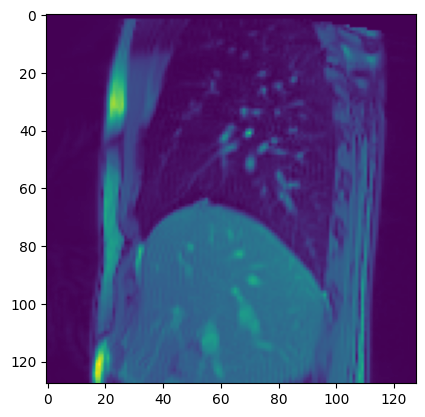

In [84]:
plt.imshow(cropped[0])

In [90]:
start_img = mr[100]

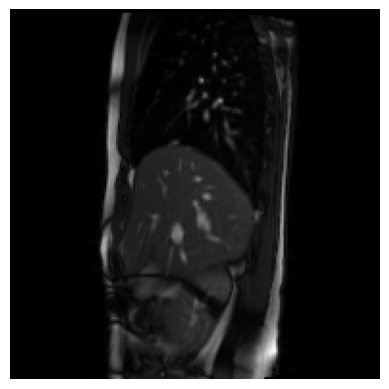

In [91]:
plt.imshow(start_img, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "start.png"), bbox_inches='tight')

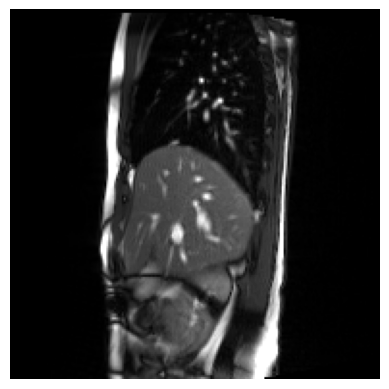

In [92]:
clipped_img = np.clip(start_img, a_min=0, a_max=255)
plt.imshow(clipped_img, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "clipped.png"), bbox_inches='tight')

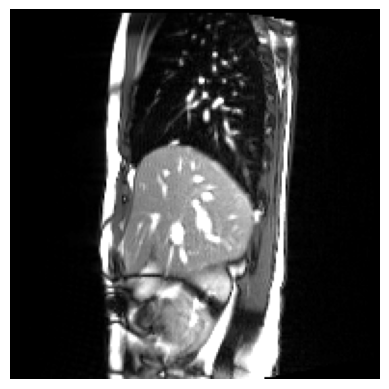

In [93]:
clipped_img = np.uint8(clipped_img)
enhanced = cv2.addWeighted(clipped_img, 2, np.zeros(clipped_img.shape, clipped_img.dtype), 0, 0)
plt.imshow(enhanced, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "contrast enhanced.png"), bbox_inches='tight')

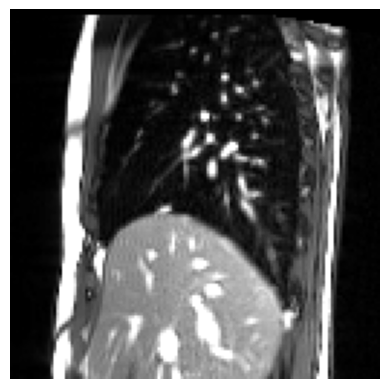

In [94]:
cropped = enhanced[:128, 32:-32]
plt.imshow(cropped, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "cropped.png"), bbox_inches='tight')

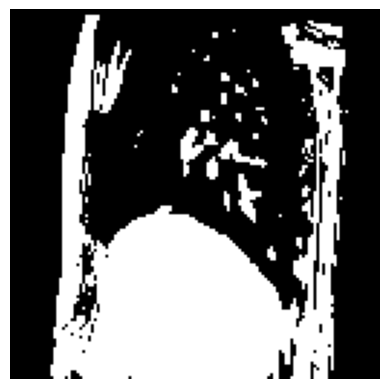

In [95]:
_, binary_mask = cv2.threshold(cropped, 80, 255, cv2.THRESH_BINARY)

plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "mask.png"), bbox_inches='tight')

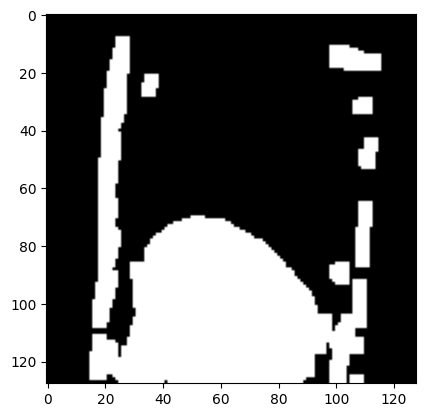

In [98]:
kernel_size = 5  # Adjust this value based on your needs
kernel = np.ones((kernel_size, kernel_size), np.uint8)

cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

plt.imshow(cleaned_mask, cmap="gray")
# plt.axis("off")
# plt.savefig(os.path.join("prep", "cleaned mask.png"), bbox_inches='tight')

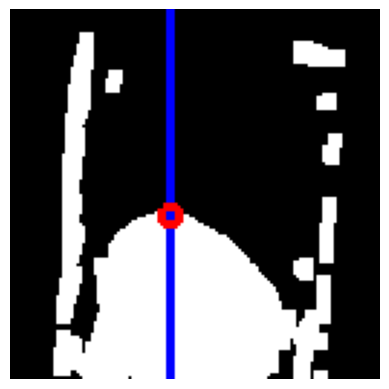

In [101]:
x = 55
line = cleaned_mask[:, x]

border = np.where(line != 0)[0][0]

color_image = cv2.cvtColor(cleaned_mask, cv2.COLOR_GRAY2BGR)
cv2.line(color_image, [x, 0], [x, color_image.shape[0]], [0, 0, 255], 2)
cv2.circle(color_image, (x, border), 3, [255, 0, 0], 2)

plt.imshow(color_image, cmap="gray")
plt.axis("off")
plt.savefig(os.path.join("prep", "tracked point.png"), bbox_inches='tight')